In [1]:
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [0]:
#Creating matrix of features
X=dataset.iloc[:,3:13].values
y=dataset.iloc[:,13].values

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***Data Preprocessing***

In [0]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [0]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [0]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
#To avoid Dummy Variable Trap
X = X[:, 1:]


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Building ANN**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [0]:
# Initialising the ANN
classifier = Sequential()

In [14]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer="glorot_normal", activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer="glorot_normal", activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer="glorot_normal", activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
8000/8000 [==============================] - 1s 163us/step - loss: 0.5420 - acc: 0.7825
Epoch 2/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4903 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4722 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4553 - acc: 0.7960
Epoch 5/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4423 - acc: 0.7960
Epoch 6/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4342 - acc: 0.7960
Epoch 7/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4288 - acc: 0.7960
Epoch 8/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4250 - acc: 0.7960
Epoch 9/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.4218 - acc: 0.7985
Epoch 10/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4190 - acc: 0.8184

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [16]:
cm

array([[1493,  102],
       [ 185,  220]])

In [17]:
cr

'             precision    recall  f1-score   support\n\n          0       0.89      0.94      0.91      1595\n          1       0.68      0.54      0.61       405\n\navg / total       0.85      0.86      0.85      2000\n'

In [18]:
history.history.keys()

dict_keys(['loss', 'acc'])

Text(0,0.5,'Loss')

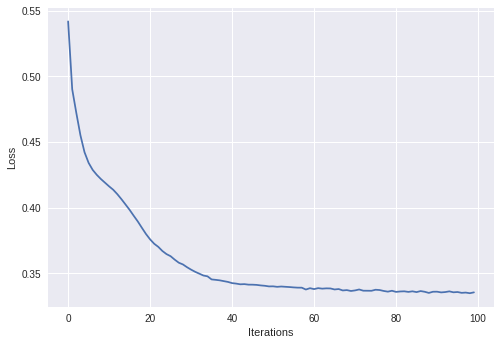

In [19]:
plt.plot(history.history['loss'])
plt.xlabel("Iterations")
plt.ylabel("Loss")
